---
# Filtering Rows
---

## Calculating Boolean statistics
We create a Boolean array by applying a condition to a column of data and then
calculate summary statistics from it

Read in the movie dataset, set the index to the movie title, and inspect the first few
rows of the duration column

In [1]:
import numpy as np
import pandas as pd

In [ ]:
movie = pd.read_csv('movie.csv', index_col='movie_title')
movie[['duration']].sample(n=8, random_state=42)

,duration
movie_title,
The Book Thief,131.0
The Beyond,82.0
Clear and Present Danger,141.0
The Ballad of Cable Hogue,121.0
Bobby Jones: Stroke of Genius,128.0
The Jungle Book,106.0
Malibu's Most Wanted,86.0
The Brain That Sings,62.0


Determine whether the duration of each movie is longer than two hours by using the
greater than comparison operator with the duration column:

In [ ]:
movie_2_hours = movie[['duration']].gt(120)
movie_2_hours

,duration
movie_title,
Avatar,True
Pirates of the Caribbean: At World's End,True
Spectre,True
The Dark Knight Rises,True
Star Wars: Episode VII - The Force Awakens,False
...,...
Signed Sealed Delivered,False
The Following,False
A Plague So Pleasant,False


We can now use this Series to determine the number of movies that are longer than
two hours

In [ ]:
movie_2_hours.sum()

duration    1039
dtype: int64

To find the percentage of movies in the dataset longer than two hours, use the `.mean` method

In [ ]:
movie_2_hours.mean().mul(100)

duration    21.135069
dtype: float64

Unfortunately, the output from step 4 is misleading. The duration column has a few missing values. If you look back at the DataFrame output from step 1, you will see that the last row is missing a value for duration. The Boolean condition in step 2 returns False for this. We need to drop the missing values first, then evaluate the condition and take the mean

In [ ]:
movie['duration'].isna().sum()

15

In [ ]:
movie[['duration']].dropna().gt(120).mean().mul(100)

duration    21.199755
dtype: float64

Use the `.describe` method to output summary statistics on the Boolean array

In [ ]:
movie_2_hours.describe()

,duration
count,4916
unique,2
top,False
freq,3877


In [ ]:
movie_2_hours.value_counts(normalize=True)

duration
False       0.788649
True        0.211351
dtype: float64

It is possible to compare two columns from the same DataFrame to produce a Boolean Series.
For instance, we could determine the percentage of movies that have actor 1 with more Facebook likes than actor 2. To do this, we would select both of these columns and then drop any of the rows that had missing values for either movie. Then we would make the comparison and calculate the mean:

In [ ]:
fb_likes = ["actor_1_facebook_likes", "actor_2_facebook_likes"]
actors = movie[fb_likes].dropna()
actors.head()

,actor_1_facebook_likes,actor_2_facebook_likes
movie_title,,
Avatar,1000.0,936.0
Pirates of the Caribbean: At World's End,40000.0,5000.0
Spectre,11000.0,393.0
The Dark Knight Rises,27000.0,23000.0
Star Wars: Episode VII - The Force Awakens,131.0,12.0


In [ ]:
(
    actors['actor_1_facebook_likes'] > actors['actor_2_facebook_likes']
).mean()

0.9777687130328371

In [ ]:
actors['actor_1_facebook_likes'].mean(), actors['actor_2_facebook_likes'].mean()

(6502.41444013869, 1621.9235162145626)

In [ ]:
actors['actor_1_facebook_likes'].mean() / actors['actor_2_facebook_likes'].mean()


4.0090758751157365

## Constructing multiple Boolean conditions
In Python, Boolean expressions use the **built-in** logical operators `and`, `or`, and `not`. These keywords do not work with Boolean indexing in pandas and are respectively replaced with `&`, `|`, and `~`. Additionally, when combining expressions, each expression must be wrapped in parentheses, or an error will be raised (due to operator precedence).

find all the movies that have an *imdb_score* greater
than **8**, a *content_rating* of **PG-13**, and a *title_year* either before **2000** or after **2009**.

In [ ]:
df = movie[['title_year', 'content_rating', 'imdb_score']]
df.head(2)

,title_year,content_rating,imdb_score
movie_title,,,
Avatar,2009.0,PG-13,7.9
Pirates of the Caribbean: At World's End,2007.0,PG-13,7.1


In [ ]:
mask = (
    (df.title_year < 2000) | (df.title_year > 2009) & 
    (df.content_rating == 'PG-13') & 
    (df.imdb_score > 8)
)
mask

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                              False
My Date with Drew                             False
Length: 4916, dtype: bool

In [ ]:
df[mask]

,title_year,content_rating,imdb_score
movie_title,,,
The Dark Knight Rises,2012.0,PG-13,8.5
The Avengers,2012.0,PG-13,8.1
Titanic,1997.0,PG-13,7.7
Captain America: Civil War,2016.0,PG-13,8.2
Wild Wild West,1999.0,PG-13,4.8
...,...,...,...
Slacker,1991.0,R,7.1
Pink Flamingos,1972.0,NC-17,6.1
The Cure,1997.0,NaN,7.4


## Filtering with boolean arrays
Both Series and DataFrame can be filtered with Boolean arrays. You can index this directly off of the object or off of the `.loc` attribute.

constructs two complex filters for different rows of movies. The first filters movies with an *imdb_score* greater than **8**, a *content_rating* of **PG-13**, and a *title_year* either before 2000 or after **2009**. The second filter consists of those with an *imdb_score*
less than **5**, a *content_rating* of **R**, and a *title_year* between **2000** and **2010**. Finally, we will combine these filters.

In [ ]:
mask1 = (
    (df.title_year < 2000) | (df.title_year > 2009) & 
    (df.content_rating == 'PG-13') & 
    (df.imdb_score > 8)
)
mask1

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                              False
My Date with Drew                             False
Length: 4916, dtype: bool

In [ ]:
mask2 = (
    (df.imdb_score < 5) &
    (df.content_rating == 'R') &
    (df.title_year >= 2000) &
    (df.title_year <= 2010)   
)
mask2

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                         False
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                              False
My Date with Drew                             False
Length: 4916, dtype: bool

Combine the two sets of criteria using the pandas or operator. This yields a Boolean
array of all movies that are members of either set

In [ ]:
mask = (mask1 | mask2)
mask

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                              False
My Date with Drew                             False
Length: 4916, dtype: bool

 Pass the Boolean array to the index operator to filter the data

In [ ]:
movie[mask].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Titanic,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,Robert Downey Jr.,272670,64798,Chris Evans,0.0,based on comic book|knife|marvel cinematic uni...,http://www.imdb.com/title/tt3498820/?ref_=fn_t...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Wild Wild West,Color,Barry Sonnenfeld,85.0,106.0,188.0,582.0,Salma Hayek,10000.0,113745408.0,Action|Comedy|Sci-Fi|Western,Will Smith,129601,15870,Bai Ling,2.0,buddy movie|general|inventor|steampunk|utah,http://www.imdb.com/title/tt0120891/?ref_=fn_t...,648.0,English,USA,PG-13,170000000.0,1999.0,4000.0,4.8,1.85,0


We can also filter off of the `.loc` attribute

In [ ]:
movie.loc[mask]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Titanic,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,Robert Downey Jr.,272670,64798,Chris Evans,0.0,based on comic book|knife|marvel cinematic uni...,http://www.imdb.com/title/tt3498820/?ref_=fn_t...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Wild Wild West,Color,Barry Sonnenfeld,85.0,106.0,188.0,582.0,Salma Hayek,10000.0,113745408.0,Action|Comedy|Sci-Fi|Western,Will Smith,129601,15870,Bai Ling,2.0,buddy movie|general|inventor|steampunk|utah,http://www.imdb.com/title/tt0120891/?ref_=fn_t...,648.0,English,USA,PG-13,170000000.0,1999.0,4000.0,4.8,1.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slacker,Black and White,Richard Linklater,61.0,100.0,0.0,0.0,Richard Linklater,5.0,1227508.0,Comedy|Drama,Tommy Pallotta,15103,5,Jean Caffeine,0.0,austin texas|moon|pap smear|texas|twenty somet...,http://www.imdb.com/title/tt0102943/?ref_=fn_t...,80.0,English,USA,R,23000.0,1991.0,0.0,7.1,1.37,2000
Pink Flamingos,Color,John Waters,73.0,108.0,0.0,105.0,Mink Stole,462.0,180483.0,Comedy|Crime|Horror,Divine,16792,760,Edith Massey,2.0,absurd humor|egg|gross out humor|lesbian|sex,http://www.imdb.com/title/tt0069089/?ref_=fn_t...,183.0,English,USA,NC-17,10000.0,1972.0,143.0,6.1,1.37,0
The Cure,Color,Kiyoshi Kurosawa,78.0,111.0,62.0,6.0,Anna Nakagawa,89.0,94596.0,Crime|Horror|Mystery|Thriller,Kôji Yakusho,6318,115,Denden,0.0,breasts|interrogation|investigation|murder|wat...,http://www.imdb.com/title/tt0123948/?ref_=fn_t...,50.0,Japanese,Japan,NaN,1000000.0,1997.0,13.0,7.4,1.85,817


In [ ]:
df[mask]

,title_year,content_rating,imdb_score
movie_title,,,
The Dark Knight Rises,2012.0,PG-13,8.5
The Avengers,2012.0,PG-13,8.1
Titanic,1997.0,PG-13,7.7
Captain America: Civil War,2016.0,PG-13,8.2
Wild Wild West,1999.0,PG-13,4.8
...,...,...,...
Slacker,1991.0,R,7.1
Pink Flamingos,1972.0,NC-17,6.1
The Cure,1997.0,NaN,7.4


The `.iloc` attribute does not support Boolean arrays! If you pass in a Boolean Series to it, an exception will get raised. However, it does work with NumPy arrays, so if you call the `.to_numpy()` method, you can filter with it

In [ ]:
df.iloc[mask.to_numpy()]

,title_year,content_rating,imdb_score
movie_title,,,
The Dark Knight Rises,2012.0,PG-13,8.5
The Avengers,2012.0,PG-13,8.1
Titanic,1997.0,PG-13,7.7
Captain America: Civil War,2016.0,PG-13,8.2
Wild Wild West,1999.0,PG-13,4.8
...,...,...,...
Slacker,1991.0,R,7.1
Pink Flamingos,1972.0,NC-17,6.1
The Cure,1997.0,NaN,7.4


## Comparing Row Filtering and Index Filtering
It is possible to replicate specific cases of Boolean selection by taking advantage of the index.
Use the college dataset to select all institutions from a particular state with both Boolean indexing and index selection and then compare each of their performances against one another. Column filtering is more powerful as you can use other logical operators and filter on multiple columns.

Read in the college dataset and use Boolean indexing to select all institutions from
the state of Texas (TX):

In [ ]:
college = pd.read_csv('college.csv')
college.head(2)

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5


In [ ]:
college[college.STABBR == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,0.6739,0.0798,0.1414,0.0090,0.0039,0.0000,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,0.5126,0.1034,0.3093,0.0500,0.0064,0.0038,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,0.5104,0.0507,0.3888,0.0293,0.0122,0.0000,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,0.5854,0.1508,0.2207,0.0076,0.0073,0.0013,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,0.5225,0.0841,0.3166,0.0087,0.0036,0.0017,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


To repeat this using index selection, move the STABBR column into the index. We can
then use label-based selection with the `.loc` indexer

In [ ]:
college2 = college.set_index('STABBR')
college2.head(2)

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,,,,,,
AL,Alabama A & M University,Normal,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
AL,University of Alabama at Birmingham,Birmingham,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5


In [ ]:
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,0.6739,0.0798,0.1414,0.0090,0.0039,0.0000,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,0.5126,0.1034,0.3093,0.0500,0.0064,0.0038,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,0.5104,0.0507,0.3888,0.0293,0.0122,0.0000,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,0.5854,0.1508,0.2207,0.0076,0.0073,0.0013,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,0.5225,0.0841,0.3166,0.0087,0.0036,0.0017,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


Let's compare the speed of both methods:

In [ ]:
%timeit college[college.STABBR== 'TX']

1000 loops, best of 5: 1 ms per loop


In [ ]:
%timeit college2.loc['TX']

The slowest run took 4.16 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 495 µs per loop


Boolean indexing takes two times as long as index selection. As setting the index does not come for free, let's time that operation as well:

In [ ]:
%timeit college2 = college.set_index('STABBR')

1000 loops, best of 5: 1.42 ms per loop


Let's select Texas (TX), California (CA), and New York (NY). With Boolean
selection, you can use the `.isin` method, but with indexing, just pass a list to `.loc`:

In [ ]:
states = ['TX', 'CA', 'NY']
college[college.STABBR.isin(states)].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
192,Academy of Art University,San Francisco,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,9885.0,0.2392,0.0685,0.1141,0.0804,0.0051,0.0058,0.0249,0.2523,0.2098,0.4334,1,0.4008,0.5524,0.4043,36000,35093
193,ITT Technical Institute-Rancho Cordova,Rancho Cordova,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,500.0,0.4720,0.1140,0.1100,0.0760,0.0080,0.0020,0.0400,0.0000,0.1780,0.2540,0,0.7137,0.7667,0.7235,38800,25827.5
194,Academy of Chinese Culture and Health Sciences,Oakland,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
195,The Academy of Radio and TV Broadcasting,Huntington Beach,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,14.0,0.2143,0.4286,0.3571,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,0.9579,1.0000,0.4545,28400,9500
196,Avalon School of Cosmetology-Alameda,Alameda,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,253.0,0.1265,0.4743,0.2253,0.0672,0.0079,0.0000,0.0553,0.0000,0.0435,0.5099,1,0.7407,0.6768,0.3387,21600,9860


In [ ]:
college2.loc[states].head(2)

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,0.6739,0.0798,0.1414,0.009,0.0039,0.0000,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,0.5126,0.1034,0.3093,0.050,0.0064,0.0038,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750


## Selecting with unique and sorted indexes


In [ ]:
college2.index.is_monotonic

False

In [ ]:
college3 = college2.sort_index()

In [ ]:
%timeit college[college.STABBR == 'TX']

1000 loops, best of 5: 982 µs per loop


In [ ]:
%timeit college2.loc['TX']

The slowest run took 4.34 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 494 µs per loop


In [ ]:
%timeit college3.loc['TX']

The slowest run took 20.13 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 71.2 µs per loop


 Let's now turn toward unique indexes. For this, we use the institution name
as the index:

In [ ]:
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

Let's select Stanford University with Boolean indexing. Note that this returns a
DataFrame

In [ ]:
college[college.INSTNM == 'Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,7018.0,0.3752,0.0591,0.1607,0.1979,0.0114,0.0038,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


Let's select Stanford University with index selection. Note that this returns a Series:

In [ ]:
college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                         0
MENONLY                      0
WOMENONLY                    0
RELAFFIL                     0
SATVRMID                   730
SATMTMID                   745
DISTANCEONLY                 0
UGDS                      7018
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                     0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object

If we want a DataFrame rather than a Series, we need to pass in a list of index values
into `.loc`

In [ ]:
college_unique.loc[['Stanford University']]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,,,,,,
Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,7018.0,0.3752,0.0591,0.1607,0.1979,0.0114,0.0038,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


 Let's time each
approach

In [ ]:
%timeit college[college['INSTNM'] == 'Stanford University']

The slowest run took 5.58 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 868 µs per loop


In [ ]:
%timeit college_unique.loc[['Stanford University']]

1000 loops, best of 5: 452 µs per loop


x. It is possible
to concatenate multiple columns together to form an index. For instance, in the following
code, we set the index equal to the concatenation of the city and state columns

In [ ]:
college.index = college["CITY"] + ", " + college["STABBR"]
college = college.sort_index()
college.head(3)

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,114.0,0.0175,0.2193,0.3860,0.3158,0.0000,0.0263,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,705.0,0.6525,0.1163,0.0780,0.0128,0.0156,0.0000,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,1693.0,0.8435,0.0230,0.0319,0.0112,0.0207,0.0030,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847


From here, we can select all colleges from a particular city and state combination without
Boolean indexing. Let's select all colleges from Miami, FL

In [ ]:
college.loc['Miami, FL'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,56.0,0.0179,0.0714,0.9107,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami, FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,708.0,0.0071,0.0523,0.9407,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami, FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami, FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami, FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,649.0,0.0894,0.1263,0.7735,0.0046,0.0,0.0015,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


## Translating SQL WHERE clauses

In [2]:
employee = pd.read_csv('./employee.csv')
employee.sample(n=8, random_state=42)

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
1860,1860,SENIOR POLICE OFFICER,Houston Police Department-HPD,NaN,White,Full Time,Male,Active,1984-11-26,2002-01-05
353,353,SENIOR POLICE OFFICER,Houston Police Department-HPD,66614.0,Black or African American,Full Time,Male,Active,1996-07-29,2009-05-30
1333,1333,INSPECTOR,Housing and Community Devp.,NaN,Hispanic/Latino,Part Time 30,Male,Active,2014-09-15,2014-09-15
905,905,POLICE CAPTAIN,Houston Police Department-HPD,NaN,White,Full Time,Male,Active,1977-12-19,1992-05-09
1289,1289,UTILITY WORKER,Public Works & Engineering-PWE,32635.0,Asian/Pacific Islander,Full Time,Male,Active,1996-02-05,2004-08-21
1273,1273,INSPECTOR,Public Works & Engineering-PWE,51584.0,White,Full Time,Male,Active,2013-04-15,2013-04-15
938,938,FIRE FIGHTER,Houston Fire Department (HFD),43528.0,Black or African American,Full Time,Male,Active,2014-06-21,2015-09-21
1731,1731,FIRE FIGHTER TRAINEE,Houston Fire Department (HFD),28024.0,NaN,Full Time,Male,Active,2016-03-28,2016-03-28


In [3]:
employee.shape

(2000, 10)

In [5]:
employee.describe(include='object').T

,count,unique,top,freq
POSITION_TITLE,2000,330,SENIOR POLICE OFFICER,220
DEPARTMENT,2000,24,Houston Police Department-HPD,638
RACE,1965,6,Black or African American,700
EMPLOYMENT_TYPE,2000,5,Full Time,1954
GENDER,2000,2,Male,1397
EMPLOYMENT_STATUS,2000,2,Active,1991
HIRE_DATE,2000,999,2016-03-28,11
JOB_DATE,1997,947,2002-01-05,34


In [6]:
employee.dtypes

UNIQUE_ID              int64
POSITION_TITLE        object
DEPARTMENT            object
BASE_SALARY          float64
RACE                  object
EMPLOYMENT_TYPE       object
GENDER                object
EMPLOYMENT_STATUS     object
HIRE_DATE             object
JOB_DATE              object
dtype: object

In [9]:
employee.select_dtypes(include='object').value_counts().head()

POSITION_TITLE               DEPARTMENT                     RACE                       EMPLOYMENT_TYPE  GENDER  EMPLOYMENT_STATUS  HIRE_DATE   JOB_DATE  
POLICE OFFICER               Houston Police Department-HPD  Hispanic/Latino            Full Time        Male    Active             2013-02-04  2014-02-04    6
                                                            White                      Full Time        Male    Active             2009-03-09  2010-03-09    4
FIRE FIGHTER                 Houston Fire Department (HFD)  Hispanic/Latino            Full Time        Male    Active             2014-06-21  2015-09-21    4
POLICE OFFICER               Houston Police Department-HPD  Black or African American  Full Time        Male    Active             2011-05-23  2012-05-23    4
POLICE OFFICER,PROBATIONARY  Houston Police Department-HPD  Black or African American  Full Time        Male    Active             2015-07-06  2016-01-21    3
dtype: int64

In [10]:
employee.DEPARTMENT.value_counts()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Parks & Recreation                 74
Solid Waste Management             43
Library                            36
Fleet Management Department        36
Admn. & Regulatory Affairs         29
Municipal Courts Department        28
Human Resources Dept.              24
Houston Emergency Center (HEC)     23
Housing and Community Devp.        22
General Services Department        22
Dept of Neighborhoods (DON)        17
Legal Department                   17
City Council                       11
Finance                            10
Houston Information Tech Svcs       9
Planning & Development              7
Mayor's Office                      5
City Controller's Office            5
Convention and Entertainment        1
Name: DEPARTMENT, dtype: int64

In [12]:
employee.GENDER.value_counts(normalize=True)

Male      0.6985
Female    0.3015
Name: GENDER, dtype: float64

In [14]:
employee.BASE_SALARY.describe()

count      1886.000000
mean      55767.931601
std       21693.706679
min       24960.000000
25%       40170.000000
50%       54461.000000
75%       66614.000000
max      275000.000000
Name: BASE_SALARY, dtype: float64

In [18]:
employee.BASE_SALARY.isna().mean() * 100.

5.7

In [22]:
depts = ["Houston Police Department-HPD", "Houston Fire Department (HFD)",]

mask = (
    (employee.DEPARTMENT.isin(depts)) &
    (employee.GENDER == 'Female') &
    (employee.BASE_SALARY >= 80000) &
    (employee.BASE_SALARY <= 120000)
)

In [23]:
select_columns = ["UNIQUE_ID", "DEPARTMENT", "GENDER", "BASE_SALARY",]

employee.loc[mask, select_columns]

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0
564,564,Houston Police Department-HPD,Female,81239.0
595,595,Houston Police Department-HPD,Female,99953.0
937,937,Houston Police Department-HPD,Female,81239.0
954,954,Houston Police Department-HPD,Female,91181.0
1118,1118,Houston Police Department-HPD,Female,104455.0


In [24]:
top_5_depts = employee.DEPARTMENT.value_counts().index[:5]
criteria = ~employee.DEPARTMENT.isin(top_5_depts)
employee[criteria]

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
18,18,MAINTENANCE MECHANIC III,General Services Department,40581.0,Hispanic/Latino,Full Time,Male,Active,2008-12-29,2008-12-29
32,32,SENIOR ACCOUNTANT,Finance,46963.0,Black or African American,Full Time,Male,Active,1991-02-11,2016-02-13
...,...,...,...,...,...,...,...,...,...,...
1976,1976,SENIOR SIDELOADER OPERATOR,Solid Waste Management,34466.0,Hispanic/Latino,Full Time,Female,Active,2015-07-20,2016-01-30
1983,1983,ADMINISTRATIVE SPECIALIST,Admn. & Regulatory Affairs,55172.0,Black or African American,Full Time,Female,Active,2006-10-16,2006-10-16
1985,1985,TRUCK DRIVER,Fleet Management Department,30222.0,Black or African American,Full Time,Male,Active,2013-06-10,2015-08-01
1988,1988,SENIOR ASSISTANT CITY ATTORNEY II,Legal Department,124115.0,White,Full Time,Male,Active,2013-01-23,2013-03-02


## Improving readability of boolean indexing with the query method
Boolean indexing is not necessarily the most pleasant syntax to read or write, especially when
using a single line to write a complex filter. pandas has an alternative string-based syntax
through the DataFrame query method that can provide more clarity.

filter the employee data for female employees from the police or fire departments who earn a salary of between 80 and 120 thousand dollars.

In [26]:
depts = ["Houston Police Department-HPD", "Houston Fire Department (HFD)",]
select_columns = ["UNIQUE_ID", "DEPARTMENT", "GENDER", "BASE_SALARY",]

Build the query string and execute the method

In [29]:
qs = (
    "DEPARTMENT in @depts "
    " and GENDER == 'Female' "
    "and 80000<=BASE_SALARY<=120000 "
)

employee_filtred = employee.query(qs)
employee_filtred[select_columns]

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0
564,564,Houston Police Department-HPD,Female,81239.0
595,595,Houston Police Department-HPD,Female,99953.0
937,937,Houston Police Department-HPD,Female,81239.0
954,954,Houston Police Department-HPD,Female,91181.0
1118,1118,Houston Police Department-HPD,Female,104455.0


Find all the female employees who were not a member
of the top 10 departments by frequency

In [33]:
top_10_depts = (
    employee.DEPARTMENT.value_counts()
    .index[:10]
    .tolist()
)

qs = "DEPARTMENT not in @top_10_depts and GENDER == 'Female'"
employee_filtred2 = employee.query(qs)
employee_filtred2.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
73,73,ADMINISTRATIVE SPECIALIST,Human Resources Dept.,55939.0,Black or African American,Full Time,Female,Active,2011-12-19,2013-11-23
96,96,ASSISTANT CITY CONTROLLER III,City Controller's Office,59077.0,Asian/Pacific Islander,Full Time,Female,Active,2013-06-10,2013-06-10
117,117,SENIOR ASSISTANT CITY ATTORNEY I,Legal Department,90957.0,Black or African American,Full Time,Female,Active,1998-03-20,2012-07-21
146,146,SENIOR STAFF ANALYST,Houston Information Tech Svcs,74951.0,White,Full Time,Female,Active,2014-03-17,2014-03-17


## Preserving Series size with the `.where` method

When you filter with Boolean arrays, the resulting Series or DataFrame is typically smaller.
The .where method preserves the size of your Series or DataFrame and either sets the values that don't meet the criteria to missing or replaces them with something else. Instead of dropping all these values, it is possible to keep them.
When you combine this functionality with the other parameter, you can create functionality similar to coalesce found in databases.

Pass the `.where` method Boolean conditions to put a floor and ceiling on the minimum and maximum number of Facebook likes for actor 1 in the movie dataset.

Read the movie dataset, set the movie title as the index, and select all the values in
the actor_1_facebook_likes column that are not missing

In [34]:
movie = pd.read_csv('./movie.csv', index_col='movie_title')
fb_likes = movie.actor_1_facebook_likes.fillna(0)
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

Let's use the describe method to get a sense of the distribution

In [35]:
fb_likes.describe()

count      4916.000000
mean       6485.240846
std       15098.211915
min           0.000000
25%         606.000000
50%         981.500000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

 Plot a histogram of this Series to visually inspect the distribution. 

In [36]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

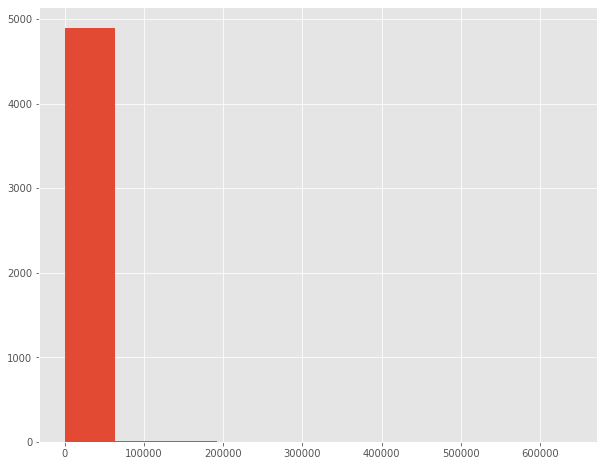

In [37]:
fig, ax = plt.subplots(figsize=(10, 8))
fb_likes.hist(ax=ax)

In [38]:
fig.savefig("c7-hist.png", dpi=300)

This visualization makes it difficult to get a sense of the distribution. On the other hand, the summary statistics from step 2 appear to be telling us that the data is highly skewed to the right with a few very large observations (more than an order of magnitude greater than the median). Let's create criteria to test whether the number of likes is fewer than 20,000:

In [41]:
criteria_high = (fb_likes < 20000)
criteria_high.mean().round(2)

0.91

In [42]:
fb_likes.where(criteria_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

The second parameter to the .where method, other, allows you to control
the replacement value. Let's change all the missing values to 20,000:

In [43]:
fb_likes.where(criteria_high, other=20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

Similarly, we can create criteria to put a floor on the minimum number of likes.
Here, we chain another .where method and replace the values not satisfying
the condition to 300:

In [45]:
criteria_low = fb_likes > 300
fb_likes_cap = (
    fb_likes.where(criteria_low, other=300)
    .where(criteria_high, other=20000)
)
fb_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

The lengths of the original Series and the modified Series are the same

In [49]:
criteria_low.mean().round(), len(fb_likes), len(fb_likes_cap)

(1.0, 4916, 4916)

Let's make a histogram with the modified Series. With the data in a much tighter
range, it should produce a better plot

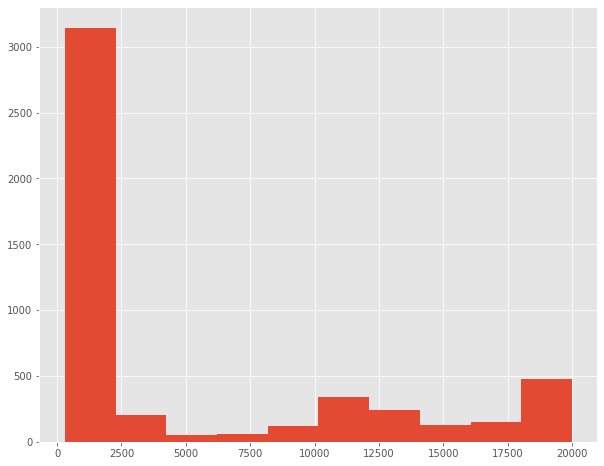

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
fb_likes_cap.hist(ax=ax)

In [48]:
fig.savefig("c7-hist2.png", dpi=300)

pandas actually has built-in methods, `.clip`, `.clip_lower`, and `.clip_upper`, that
replicate this operation. The `.clip` method can set a floor and ceiling at the same time:

In [51]:
fb_likes_cap2 = fb_likes.clip(lower=300, upper=20000)
fb_likes_cap.equals(fb_likes_cap2)

True